In [243]:
# Imports
import myPCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [244]:
# Upload and first check
df = pd.read_csv('titanic.csv',delimiter=",",decimal=".")
print("Tamaño de datos:\n",df.shape)
print("Tipos de Columnas:\n",df.dtypes)
NaNColumns = df.columns[df.isna().any()]
print("Columnas con NA:\n",NaNColumns)
print("Cantidad de NA por columna:\n",df[NaNColumns].isnull().sum(axis = 0))


Tamaño de datos:
 (1309, 12)
Tipos de Columnas:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Columnas con NA:
 Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Cantidad de NA por columna:
 Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [245]:

'''
Columns erased:
1. PassengerId: Is is just data to recognize a passenger and not make any effect in the survival
2. Name: Is is just data to recognize a passenger and not make any effect in the survival
3. Ticket: Is is just data to recognize a passenger and not make any effect in the survival
3. Cabin: Have values with more than a 75% of data with NaN
'''
df.drop(columns = ["PassengerId" ,"Name","Cabin","Ticket"],inplace=True)
before = df.shape
df.dropna(inplace= True)
print("Se borran en total",(before[0]-df.shape[0]),"registros")

Se borran en total 266 registros


Descripcion:
                Age        SibSp        Parch         Fare
count  1043.000000  1043.000000  1043.000000  1043.000000
mean     29.813202     0.504314     0.421860    36.603024
std      14.366254     0.913080     0.840655    55.753648
min       0.170000     0.000000     0.000000     0.000000
25%      21.000000     0.000000     0.000000     8.050000
50%      28.000000     0.000000     0.000000    15.750000
75%      39.000000     1.000000     1.000000    35.077100
max      80.000000     8.000000     6.000000   512.329200


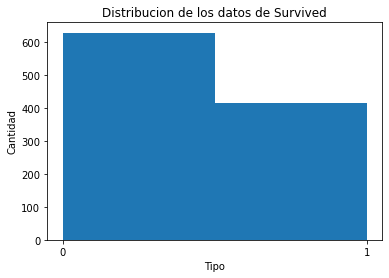

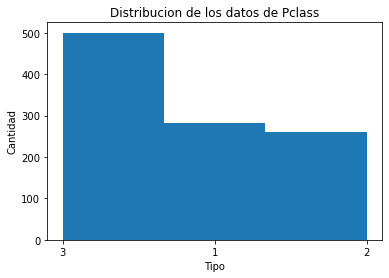

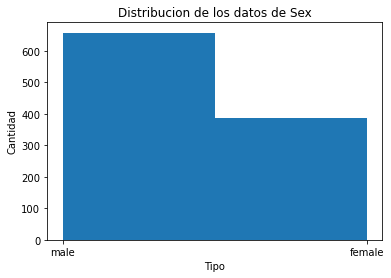

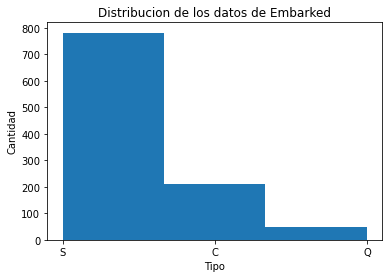

In [246]:
numericColumns = ['Age','SibSp','Parch','Fare']
categoricalColumns = ['Survived','Pclass','Sex','Embarked']
numericos = df.loc[:,numericColumns]
categoricos = df.loc[:,categoricalColumns]
print("Descripcion:\n",numericos.describe())

for column in categoricos.columns:
	datos = categoricos.loc[:,column]
	categorias = datos.unique()
	mapeo = {}
	for i in range(len(categorias)):
		mapeo[categorias[i]] = i
	plt.hist(datos.map(mapeo),bins=len(categorias))
	plt.title("Distribucion de los datos de "+column)
	plt.xlabel("Tipo")
	plt.ylabel("Cantidad")
	plt.xticks(range(len(categorias)),categorias)
	plt.show()
# plt.hist(numericos['SibSp'],bins=30)
# plt.show()
# plt.hist(numericos['Parch'],bins=30)
# plt.show

In [247]:
import seaborn as sns
# Nos permite hacer el ploteo en todas las columnas
# sns.pairplot(df, hue = 'Survived')

In [248]:
df = pd.get_dummies(df,columns=categoricalColumns)
df.keys()
df

,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3.0,1,1,13.7750,0,1,0,0,1,1,0,0,0,1
1302,37.0,1,0,90.0000,0,1,1,0,0,1,0,0,1,0
1303,28.0,0,0,7.7750,0,1,0,0,1,1,0,0,0,1
1305,39.0,0,0,108.9000,0,1,1,0,0,1,0,1,0,0


In [249]:
'''
Part 2. Conversion dataframe to numpy2D
'''
matrixArray = np.transpose(df.to_numpy())

In [255]:
matrix = np.dot(matrixArray,np.transpose(matrixArray))
correlation = matrix/matrixArray.shape[0]
correlation

array([[ 1.00000000e+00, -2.42344894e-01, -1.49310635e-01,
         1.77205685e-01,  5.56870275e-02, -5.56870275e-02,
         3.92979186e-01, -1.23312840e-02, -3.38691088e-01,
        -6.60062982e-02,  6.60062982e-02,  8.86042849e-02,
        -1.84898813e-02, -7.31063460e-02],
       [-2.42344894e-01,  1.00000000e+00,  3.73959665e-01,
         1.42130541e-01, -1.22544320e-02,  1.22544320e-02,
        -1.70694813e-02, -5.48763554e-02,  6.27557734e-02,
         9.64642007e-02, -9.64642007e-02, -4.67670472e-02,
         3.85663881e-03,  4.14945219e-02],
       [-1.49310635e-01,  3.73959665e-01,  1.00000000e+00,
         2.17649538e-01, -1.16394321e-01,  1.16394321e-01,
        -5.04697856e-03, -2.13523165e-02,  2.30003705e-02,
         2.22530826e-01, -2.22530826e-01,  1.60394678e-03,
        -4.85666673e-02,  2.24350658e-02],
       [ 1.77205685e-01,  1.42130541e-01,  2.17649538e-01,
         1.00000000e+00, -2.38495201e-01,  2.38495201e-01,
         6.08589291e-01, -1.52891876e-01, -4.

In [314]:
eigenValues, eigenVectors = np.linalg.eigh(correlation)
eigenValues = np.absolute(eigenValues)
sortIndex = np.argsort(eigenValues)
sortIndex

array([[-4.57890284e-02, -4.26399635e-02, -1.17008998e-01,
        -2.67689948e-01,  4.30882279e-01, -4.30882279e-01,
        -2.64811834e-01,  1.03728165e-02,  2.26440456e-01,
        -4.07226011e-01,  4.07226011e-01, -2.15029943e-01,
        -9.90390841e-04,  2.00010051e-01],
       [ 3.35257105e-01, -1.43309083e-01, -1.54393295e-01,
         2.86953808e-01,  1.89165880e-01, -1.89165880e-01,
         4.20208324e-01, -1.40214022e-01, -2.52020134e-01,
        -2.79887050e-01,  2.79887050e-01,  3.88596546e-01,
        -2.50672723e-02, -3.48223523e-01],
       [ 2.71376822e-01, -1.84499144e-01, -1.31999375e-01,
         2.33194305e-02, -4.79295390e-02,  4.79295390e-02,
         8.65934235e-02,  4.99541191e-01, -5.10108682e-01,
        -3.52448064e-02,  3.52448064e-02, -2.71563201e-01,
        -3.25799289e-01,  4.12463019e-01],
       [-1.07466823e-01,  5.55025584e-01,  5.31316272e-01,
         3.60858195e-01,  1.33460625e-01, -1.33460625e-01,
         1.84975953e-01, -1.31880008e-01, -5.

In [312]:
''''
Inertia values
'''
totalValues = correlation.shape[0]
inertiaMYPCA =[value/totalValues for value in eigenValues]
inertiaMYPCA

array([-5.55111512e-17, -2.22044605e-16,  6.66133815e-16, -5.55111512e-17,
        1.80411242e-16,  1.24900090e-16,  5.55111512e-17, -4.16333634e-17,
       -1.04083409e-16,  6.59194921e-17,  2.00055955e-16,  2.18071019e-17,
        6.99824485e-18,  3.40429534e-19])

In [270]:
df

,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3.0,1,1,13.7750,0,1,0,0,1,1,0,0,0,1
1302,37.0,1,0,90.0000,0,1,1,0,0,1,0,0,1,0
1303,28.0,0,0,7.7750,0,1,0,0,1,1,0,0,0,1
1305,39.0,0,0,108.9000,0,1,1,0,0,1,0,1,0,0


In [271]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [272]:
from sklearn.decomposition import PCA
pca = PCA()
C = pca.fit_transform(df_scaled)

In [273]:
import numpy as np
inertia = pca.explained_variance_ratio_
V = pca.transform(np.identity(df_scaled.shape[1]))

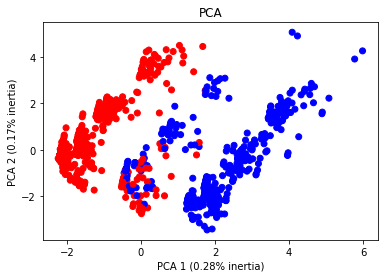

In [274]:
import matplotlib.pyplot as plt
plt.scatter(np.ravel(C[:,0]),np.ravel(C[:,1]),c = ['b' if i==1 else 'r' for i in df["Survived_1"]])
plt.xlabel('PCA 1 (%.2f%% inertia)' % (inertia[0],))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (inertia[1],))
plt.title('PCA')
plt.show()

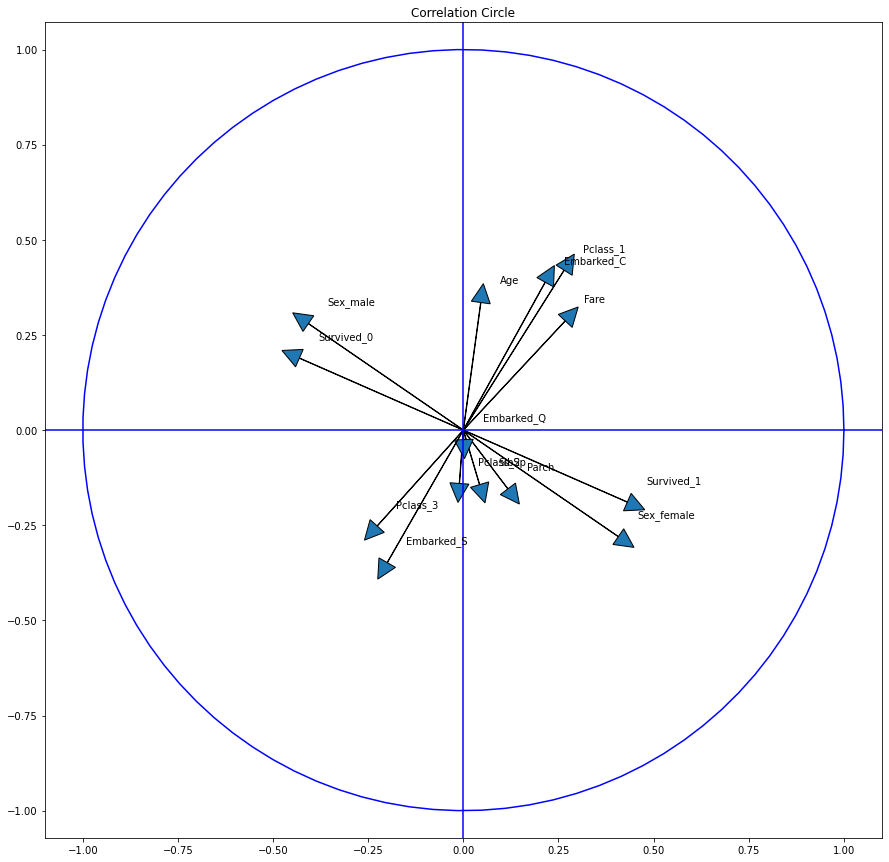

In [275]:
plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, df.shape[1]):
    plt.arrow(0,0, V[i, 0], # x - PC1
        V[i, 1], # y - PC2
        head_width=0.05, head_length=0.05)
    plt.text(V[i, 0] + 0.05, V[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b") # Circle
plt.axis('equal')
plt.title('Correlation Circle')
plt.show()